# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import pydotplus
import graphviz
import os


C:\Users\musta\AppData\Local\Temp\ipykernel_11916\2857205906.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Importing Dataset and Preprocessing

In [2]:
base_dir = 'flowers'

img_size = 224
batch = 64

In [3]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
                                                  target_size = (img_size, img_size),
                                                  subset = 'training',
                                                  batch_size = batch)

test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size = (img_size, img_size),
                                                subset = 'validation',
                                                batch_size = batch)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


# Model Development

In [4]:
# Modelling starts using a CNN

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same',
                 activation = 'relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = 'softmax'))

c:\Users\musta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,111,365 (50.02 MB)

 Trainable params: 13,111,365 (50.02 MB)

 Non-trainable params: 0 (0.00 B)

<IPython.core.display.Javascript object>

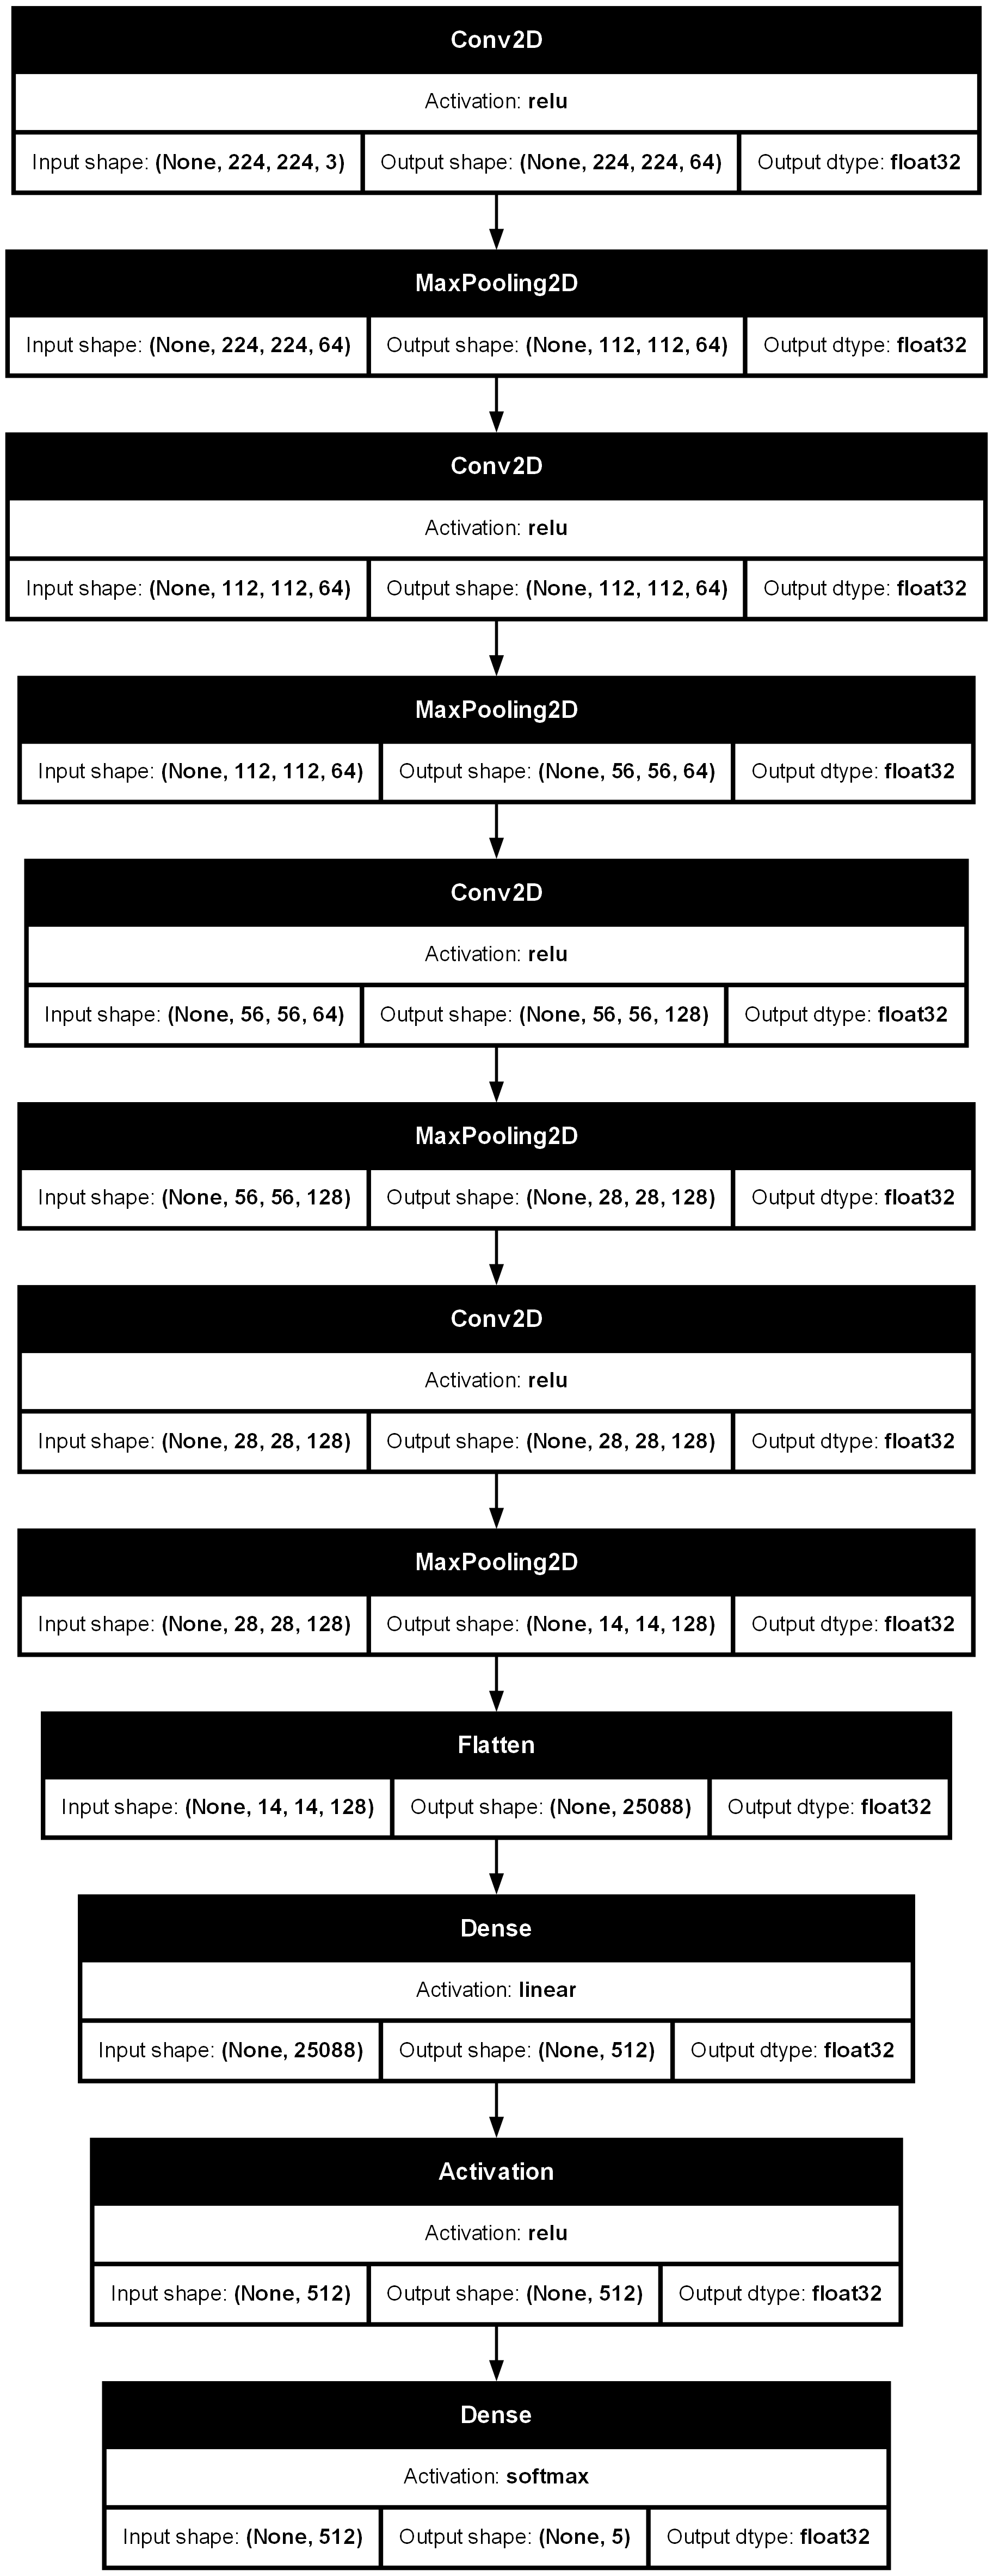

In [6]:
keras.utils.plot_model( 
    model, 
    show_shapes = True, 
    show_dtype = True, 
    show_layer_activations = True
)

## Compiling

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting

In [8]:
epochs = 30
model.fit(train_datagen, epochs = epochs, validation_data = test_datagen)

Epoch 1/30


c:\Users\musta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 30175s 4s/step - accuracy: 0.3146 - loss: 1.5957 - val_accuracy: 0.5047 - val_loss: 1.1799
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.5055 - loss: 1.1775 - val_accuracy: 0.5872 - val_loss: 1.0924
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.6117 - loss: 1.0192 - val_accuracy: 0.5698 - val_loss: 1.0860
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5914 - loss: 1.0456 - val_accuracy: 0.6186 - val_loss: 0.9609
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6194 - loss: 0.9527 - val_accuracy: 0.6465 - val_loss: 0.9226
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1086s 20s/step - accuracy: 0.6842 - loss: 0.8305 - val_accuracy: 0.6535 - val_loss: 0.9112
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.7054 - loss: 0.7791 - val_accuracy: 0.6395 - val_loss: 0.9410
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.6853 - loss: 0.8148 - val_accuracy: 0.6581 - val_loss

## Model saving

In [15]:

from tensorflow.keras.models import load_model 
model.save('Model.h5') 
   
# load model 
savedModel=load_model('Model.h5')

## Model Evaluation and Prediction

In [9]:
train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[0. 0. 1. 0. 0.]]
Rose


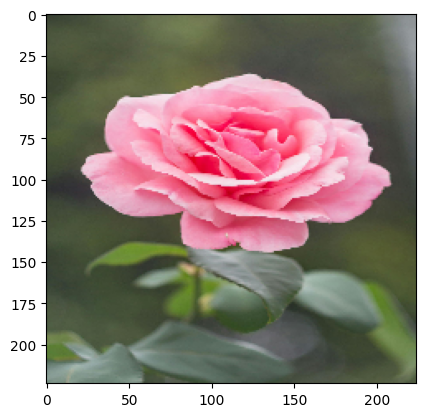

In [17]:
from keras.preprocessing import image 
  
#Creating list for mapping 
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip'] 
  
#Input image 
test_image = image.load_img('img.jpg',target_size=(224,224)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = savedModel.predict(test_image) 
print(result) 
  
#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
    print(list_[i]) 
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0. 0. 0. 0. 1.]]
tulip


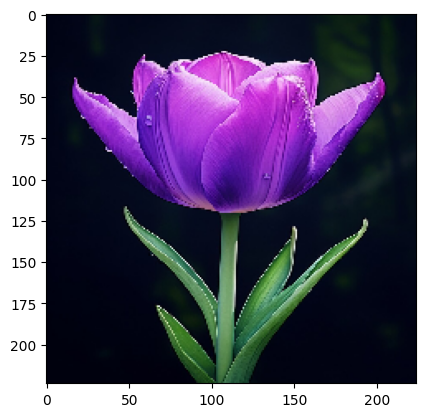

In [18]:
#Input image 
test_image = image.load_img('img2.jpg',target_size=(224,224)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = savedModel.predict(test_image) 
print(result) 
  
#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
    print(list_[i]) 
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[1. 0. 0. 0. 0.]]
Daisy


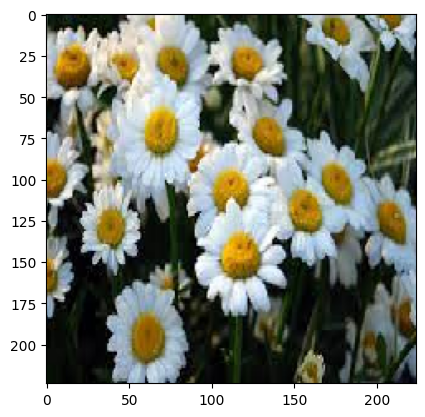

In [20]:
#Input image 
test_image = image.load_img('img3.jpeg',target_size=(224,224)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = savedModel.predict(test_image) 
print(result) 
  
#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
    print(list_[i]) 
    break